<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/Telco_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telco Customer Churn using Logistic Regression

OBJECTIVE: we predict whether a customer will end their relationship with company.



1.Import the required libraries.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
import joblib

2.Import & Load Data

In [43]:
from google.colab import files
uploaded = files.upload()

Saving telco_customer_churn.xlsx to telco_customer_churn (3).xlsx


3. Process the Data

In [44]:
df = pd.read_excel("telco_customer_churn.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.shape

(7043, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.797129,2279.013494
std,0.368612,24.559481,30.121287,2265.786705
min,0.000000,0.000000,18.250000,18.250000
25%,0.000000,9.000000,35.580000,399.975000
50%,0.000000,29.000000,70.400000,1392.250000
75%,0.000000,55.000000,89.875000,3783.620000
max,1.000000,72.000000,118.750000,8684.800000


In [48]:
#checking for null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [49]:
# Investigate the elements in each feature
for column in df:
  unique_values = np.unique(df[column].astype(str))  # Indented properly
  nr_values = len(unique_values)  # Indented properly
  if len(unique_values) <= 10:
    print("The number of values for feature '{}' is: {}.....{}".format(column, nr_values, unique_values))
  else:
    print("The number of values for feature '{}' is: {}".format(column, nr_values))

The number of values for feature 'customerID' is: 7043
The number of values for feature 'gender' is: 2.....['Female' 'Male']
The number of values for feature 'SeniorCitizen' is: 2.....['0' '1']
The number of values for feature 'Partner' is: 2.....['No' 'Yes']
The number of values for feature 'Dependents' is: 2.....['No' 'Yes']
The number of values for feature 'tenure' is: 73
The number of values for feature 'PhoneService' is: 2.....['No' 'Yes']
The number of values for feature 'MultipleLines' is: 3.....['No' 'No phone service' 'Yes']
The number of values for feature 'InternetService' is: 3.....['DSL' 'Fiber optic' 'No']
The number of values for feature 'OnlineSecurity' is: 3.....['No' 'No internet service' 'Yes']
The number of values for feature 'OnlineBackup' is: 3.....['No' 'No internet service' 'Yes']
The number of values for feature 'DeviceProtection' is: 3.....['No' 'No internet service' 'Yes']
The number of values for feature 'TechSupport' is: 3.....['No' 'No internet service' 'Y

In [130]:
# Shuffle the data to reduce bias
cleaned_df = df.sample(frac=1)
cleaned_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5901,6172-FECYY,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,84.50,4254.85,Yes
6235,5180-UCIIQ,Male,1,Yes,Yes,22,No,No phone service,DSL,Yes,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.05,880.20,Yes
5861,9631-RXVJM,Male,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.25,677.90,No
6141,5385-SUIRI,Male,1,Yes,No,52,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.25,5568.35,Yes
1448,2958-NHPPS,Male,0,No,No,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.85,473.90,No


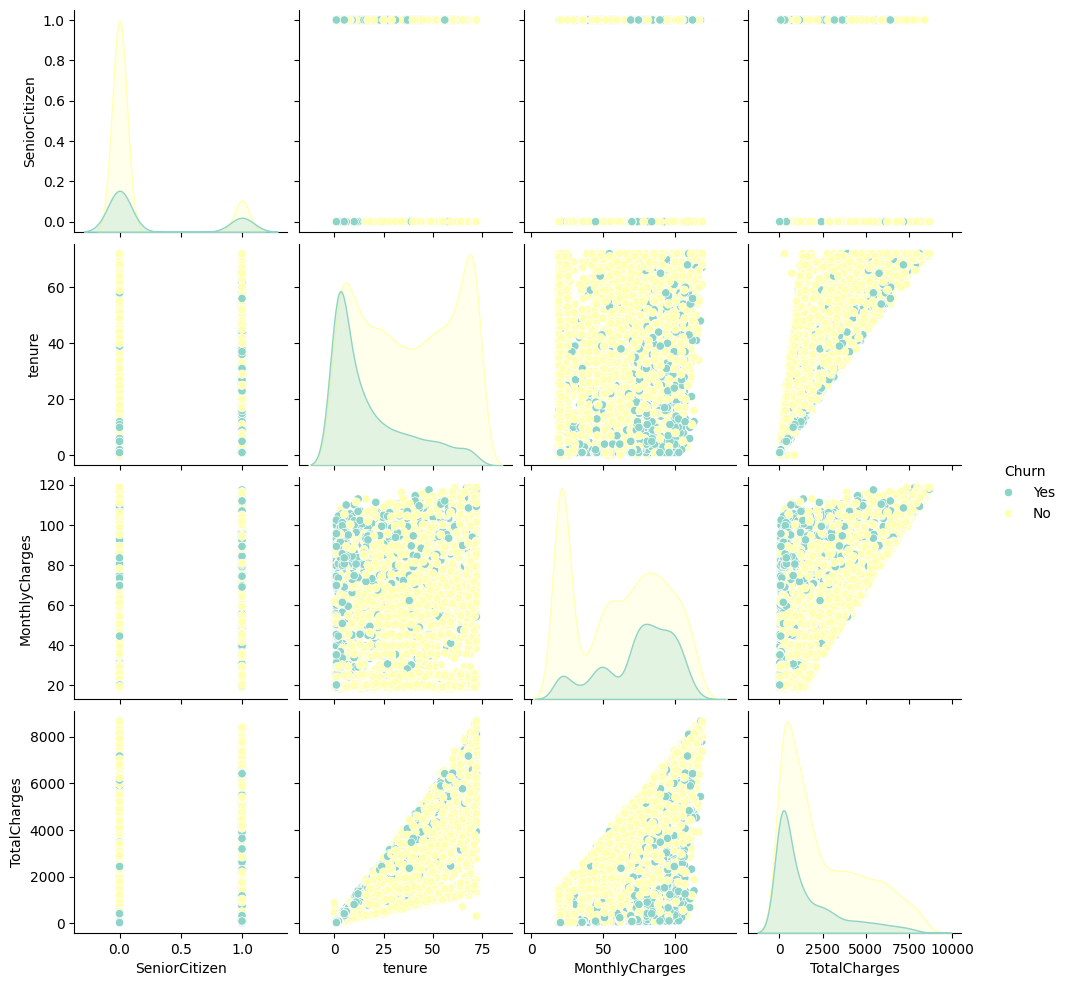

In [52]:
#Visualize data using pairplots
import pandas as pd
import seaborn as sns
g = sns.pairplot(cleaned_df, hue = 'Churn', palette ='Set3')

<ipython-input-131-523381075f0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Churn', data = cleaned_df, palette = 'Set3')


<Axes: xlabel='Churn', ylabel='count'>

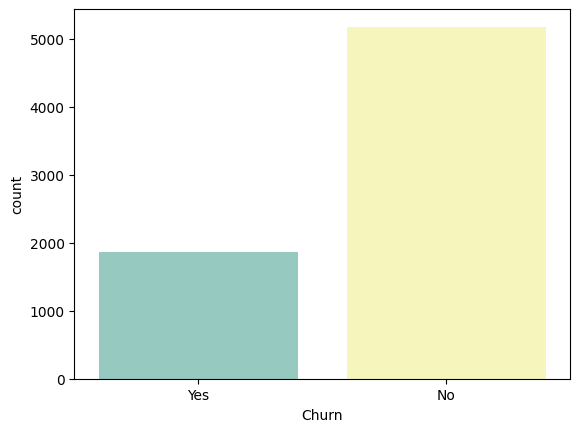

In [131]:
#Investigating the distribution of y
sns.countplot(x = 'Churn', data = cleaned_df, palette = 'Set3')

In [66]:
cleaned_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

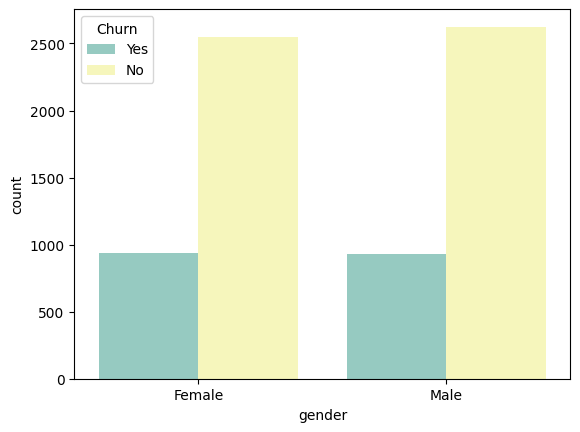

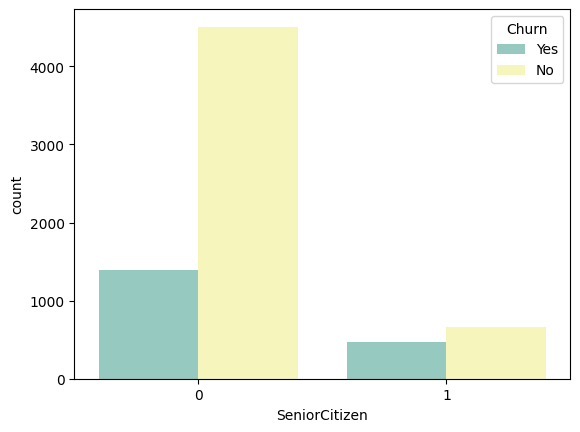

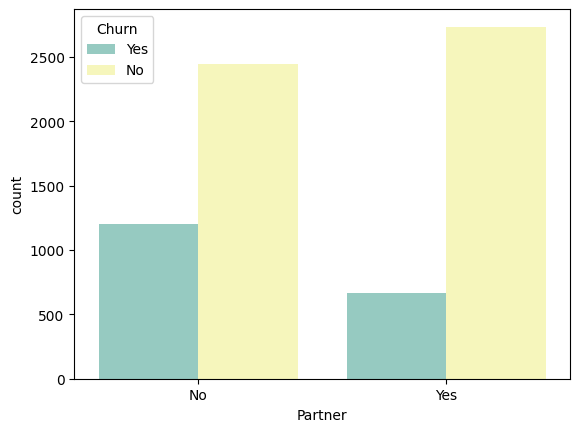

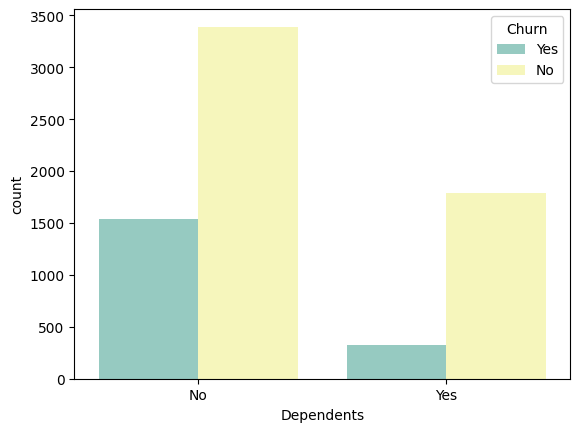

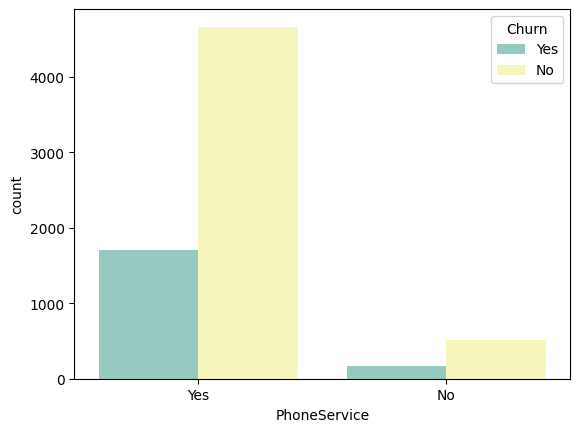

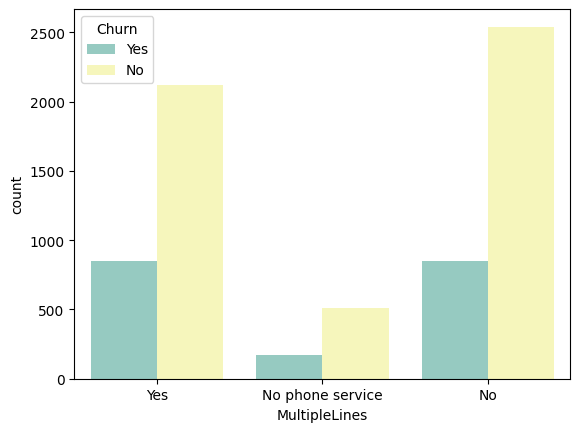

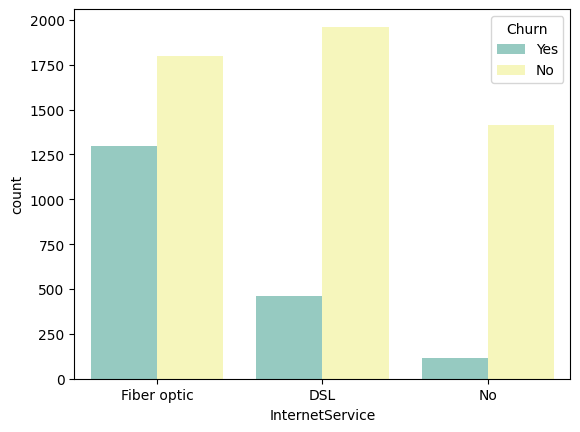

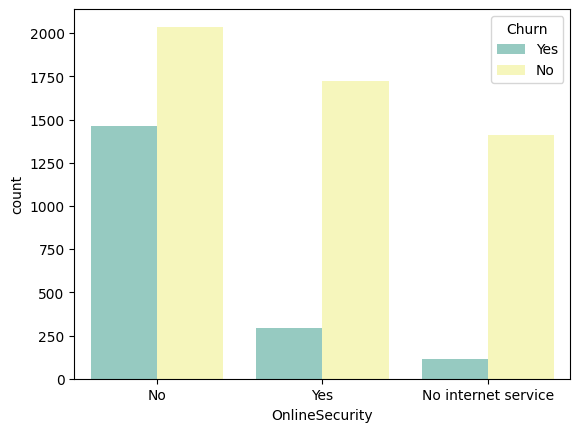

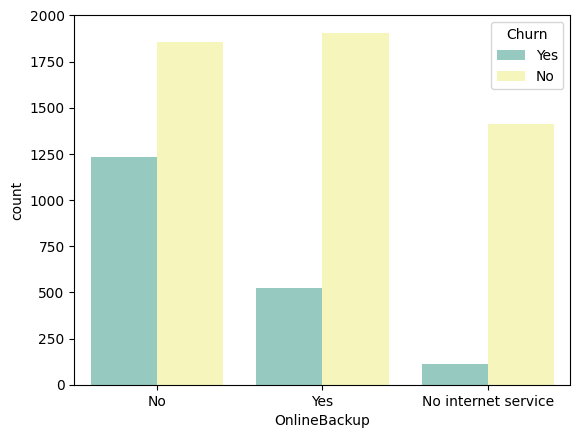

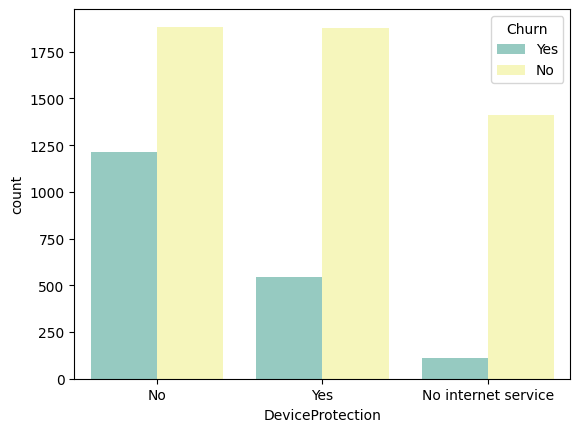

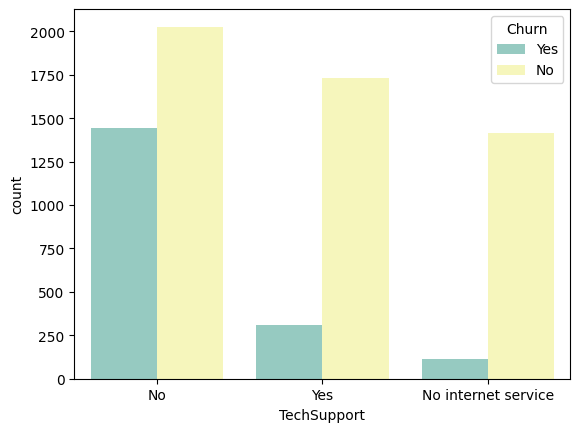

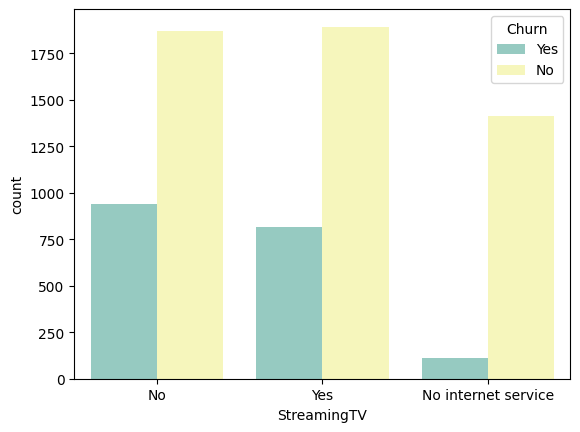

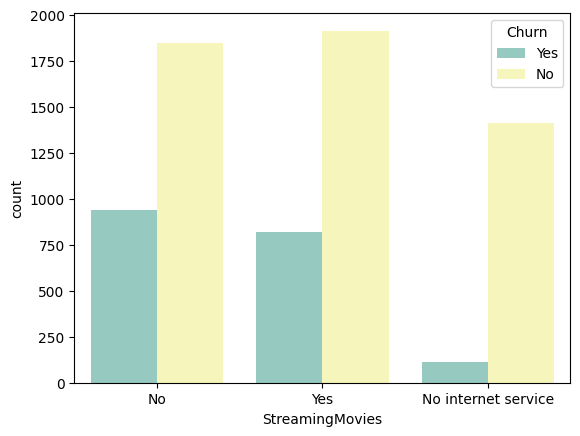

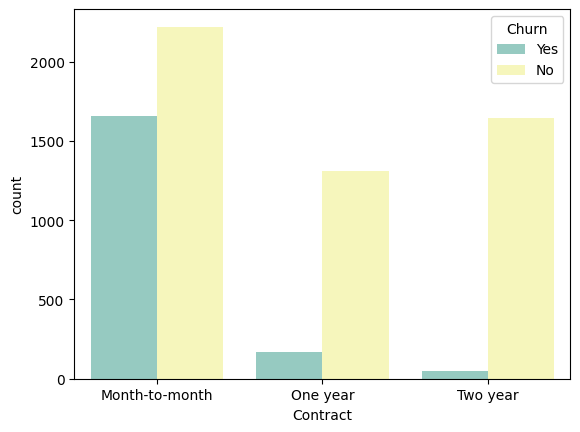

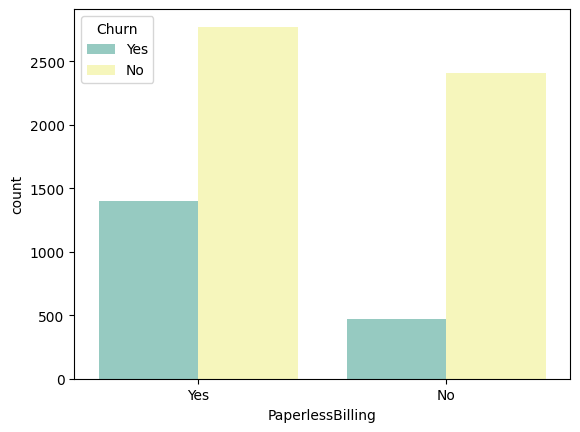

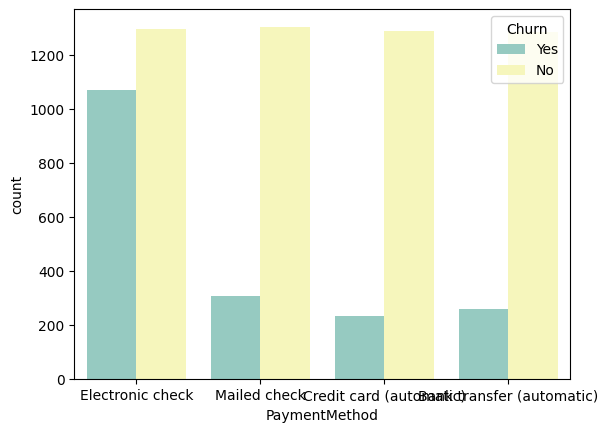

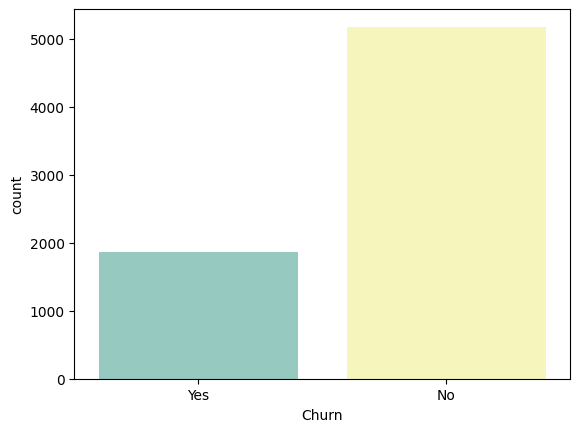

In [73]:
# Looping through all the features by our y variable - see if there is relationship
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

for f in features:
  sns.countplot(x=f, hue='Churn', data=cleaned_df, palette='Set3')
  plt.show()

In [77]:
#Making categorical variables into numeric representation
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
new_cleaned_df = pd.get_dummies(cleaned_df, columns = features, dtype=int) # Change: Set dtype within get_dummies
# new_cleaned_df = new_cleaned_df.astype(int) # Remove this line as it is no longer needed
new_cleaned_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1223,2,75.90,143.35,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3583,40,60.36,2448.50,No,0,1,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4432,37,40.55,1390.85,No,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
6566,70,116.55,8152.30,No,0,1,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
6469,35,21.45,705.45,No,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [80]:
# Display the head of the updated DataFrame
new_cleaned_df.head()

#Creating a new 0-1 y variable
new_cleaned_df['Churn'] =new_cleaned_df['Churn'].replace({'No':0, 'Yes':1})
new_cleaned_df.head()

<ipython-input-80-ac20225d46ec>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_cleaned_df['Churn'] =new_cleaned_df['Churn'].replace({'No':0, 'Yes':1})


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1223,2,75.90,143.35,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3583,40,60.36,2448.50,0,0,1,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4432,37,40.55,1390.85,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
6566,70,116.55,8152.30,0,0,1,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
6469,35,21.45,705.45,0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [83]:
import pandas as pd
new_cleaned_df.dropna(subset = ['Churn'], inplace = True)
new_cleaned_df

#Split data into (x) & (y)
x = new_cleaned_df.drop('Churn', axis = 1).values
y = new_cleaned_df['Churn']

y = y.astype(int)
print(x.shape)
print(y.shape)

(7043, 46)
(7043,)


In [87]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [91]:
# Running Feature Importance
fi_col= []
fi=[]

for i,column in enumerate(new_cleaned_df.drop('Churn', axis = 1)):
  print('The feature importance {} is:{}'.format(column, dt.feature_importances_[i]))



The feature importance tenure is:0.12588587437155804
The feature importance MonthlyCharges is:0.11691549768225605
The feature importance TotalCharges is:0.13433252040974403
The feature importance gender_Female is:0.006511283742906298
The feature importance gender_Male is:0.006964425239598935
The feature importance SeniorCitizen_0 is:0.007993005235174148
The feature importance SeniorCitizen_1 is:0.009124559404103744
The feature importance Partner_No is:0.011881093068907618
The feature importance Partner_Yes is:0.0050131041088836495
The feature importance Dependents_No is:0.004431411898503261
The feature importance Dependents_Yes is:0.00926368462056371
The feature importance PhoneService_No is:0.006086463749236151
The feature importance PhoneService_Yes is:0.002544959500256804
The feature importance MultipleLines_No is:0.004824030912405847
The feature importance MultipleLines_No phone service is:0.0
The feature importance MultipleLines_Yes is:0.006005886641741785
The feature importance I

In [92]:
import pandas as pd

# Initialize lists for features and their importance values
fi_col = []
fi = []

# Populate the lists with feature names and importance scores, excluding zeros
for i, column in enumerate(new_cleaned_df.drop('Churn', axis=1)):
    importance = dt.feature_importances_[i]
    if importance > 0:  # Only include features with importance greater than 0
        print(f'The feature importance for {column} is : {importance}')
        fi_col.append(column)
        fi.append(importance)



The feature importance for tenure is : 0.12588587437155804
The feature importance for MonthlyCharges is : 0.11691549768225605
The feature importance for TotalCharges is : 0.13433252040974403
The feature importance for gender_Female is : 0.006511283742906298
The feature importance for gender_Male is : 0.006964425239598935
The feature importance for SeniorCitizen_0 is : 0.007993005235174148
The feature importance for SeniorCitizen_1 is : 0.009124559404103744
The feature importance for Partner_No is : 0.011881093068907618
The feature importance for Partner_Yes is : 0.0050131041088836495
The feature importance for Dependents_No is : 0.004431411898503261
The feature importance for Dependents_Yes is : 0.00926368462056371
The feature importance for PhoneService_No is : 0.006086463749236151
The feature importance for PhoneService_Yes is : 0.002544959500256804
The feature importance for MultipleLines_No is : 0.004824030912405847
The feature importance for MultipleLines_Yes is : 0.00600588664174

In [94]:
# Create a DataFrame for the non-zero feature importances
fi_df = pd.DataFrame(zip(fi_col, fi), columns=['Feature', 'Feature Importance'])

# Sort the DataFrame by feature importance
fi_d1 = fi_df.sort_values('Feature Importance', ascending=False).reset_index(drop=True)
columns_to_keep = fi_df['Feature']
# Display the top rows of the resulting DataFrame
fi_df

,Feature,Feature Importance
0,tenure,0.125886
1,MonthlyCharges,0.116915
2,TotalCharges,0.134333
3,gender_Female,0.006511
4,gender_Male,0.006964
5,SeniorCitizen_0,0.007993
6,SeniorCitizen_1,0.009125
7,Partner_No,0.011881
8,Partner_Yes,0.005013
9,Dependents_No,0.004431


Splitting the Raw Data - Hold-out validation

In [96]:
# Print the shapes

print(new_cleaned_df.shape)
print(new_cleaned_df[columns_to_keep].shape)

(7043, 47)
(7043, 38)


In [106]:
# Split the data into x & y

x = new_cleaned_df[columns_to_keep].values
x

y = new_cleaned_df['Churn']
y = y.astype(int)
y

print(x.shape)
print(y.shape)

(7043, 38)
(7043,)


In [109]:
from sklearn.model_selection import train_test_split
# first one
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state =15)

# Second one
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(5070, 38)
(1409, 38)
(564, 38)
(5070,)
(1409,)
(564,)


<ipython-input-110-610e9f644126>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_valid,  palette = "Set3")


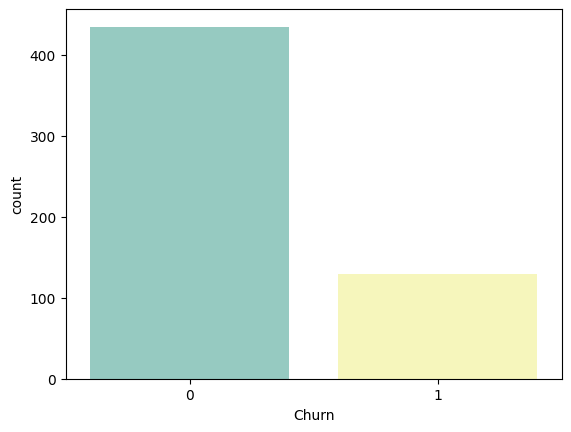

In [110]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_valid,  palette = "Set3")

#What is Logistic Regression

Famous statistical method for predicting two or more binary classes; not continues numbers. Hence, Logistic regression is used for classification problems To make it work, we transform our linear regression line into a logistic regression curve so we can get a good fit of our data

In [111]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [112]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(x_train)
y_pred = log_reg.predict(x_train)

# predict_proba - Probability estimates
log_reg.predict_proba(x_train)
pred_proba = log_reg.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

array([[-6.48318962e-02,  8.97215128e-03,  3.55078002e-04,
        -9.21834011e-02, -1.31572930e-01, -2.26323582e-01,
         2.56725114e-03, -1.29542897e-01, -9.42134347e-02,
        -9.24634473e-04, -2.22831697e-01,  7.14586158e-02,
        -2.95214947e-01, -1.88578842e-01, -1.06636105e-01,
         4.31572739e-01,  2.59901787e-01, -3.04474194e-01,
         1.29637624e-01, -1.74210031e-01,  1.89612862e-03,
        -4.64685358e-02,  2.29144252e-01, -2.73716659e-01,
        -9.94763822e-02, -1.79183924e-01,  5.49039751e-02,
        -1.32619318e-01,  8.80469108e-02,  4.18120794e-01,
        -1.70279318e-01, -4.71597808e-01, -2.77594630e-01,
         5.38382987e-02, -1.45241813e-01, -1.35285187e-01,
         2.91752994e-01, -2.34982325e-01]])

In [113]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.8025641025641026
The Testing Accuracy is:  0.8005677785663591
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3687
           1       0.66      0.56      0.61      1383

    accuracy                           0.80      5070
   macro avg       0.75      0.73      0.74      5070
weighted avg       0.79      0.80      0.80      5070



In [114]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

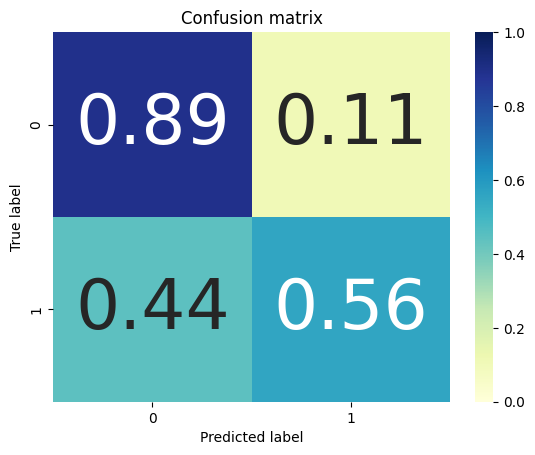

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have your y_train and y_pred defined
# y_train = ... (Your true labels)
# y_pred = ... (Your predicted labels from the model)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm

#Normalize
cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)
cm_norm

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [116]:
log_reg.classes_

array([0, 1])

In [117]:
cm.sum(axis=1)
cm_norm


array([[0.89422295, 0.10577705],
       [0.4417932 , 0.5582068 ]])

In [118]:
cm

array([[3297,  390],
       [ 611,  772]])

In [119]:
cm.sum(axis=0)

array([3908, 1162])

In [120]:
cm.sum(axis=1)

array([3687, 1383])

In [122]:
np.diag(cm)

array([3297,  772])

In [123]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.89422295 0.5582068 ]
The Precision is: [0.84365404 0.66437177]
The False positive rate is: [0.4417932  0.10577705]
The False Negative Rate is:  [0.10577705 0.4417932 ]

The average TPR is: 0.7262148711513219
The average Precision is: 0.7540129078971244
The average False positive rate is: 0.273785128848678
The average False Negative Rate is: 0.273785128848678


 #ROC-AUC Score

Quantifies the model's ability to distinguish between classes, with higher values indicating better separation.

In [127]:
# Replace y_pred with predictions on the test set
y_pred = log_reg.predict(x_test)

# Calculate ROC-AUC score
rocauc = roc_auc_score(y_test, y_pred)
print(rocauc)

0.723027233707171


#ROC Curve

Plots the trade-off between true positive rate (TPR) and false positive rate (FPR) at various thresholds.

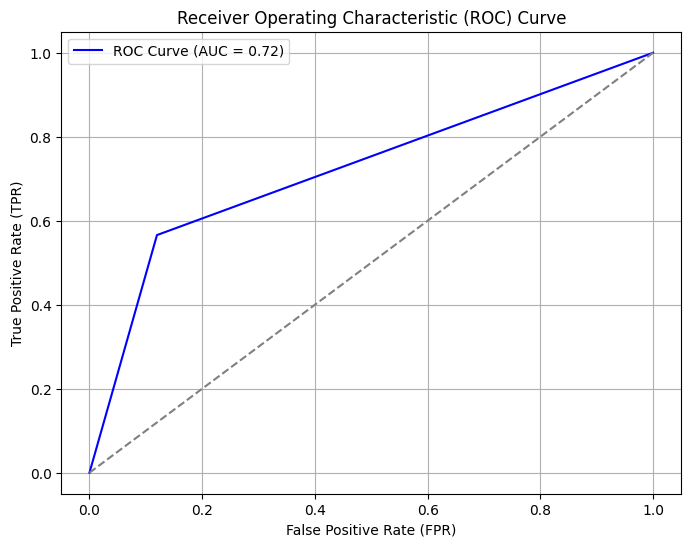

In [129]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {rocauc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()